In [ ]:
# Importer les packages
# Installer Java 8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Télécharger et installer Spark 3.5.3
!wget -q https://downloads.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
!tar xf spark-3.5.3-bin-hadoop3.tgz

# Installer findspark pour faciliter la configuration de l'environnement Spark
!pip install -q findspark

# Configurer les variables d'environnement
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"

In [ ]:
# Initialiser PySpark
import pandas as pd
import findspark
findspark.init()

# Créer une session Spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import (
    col,
    when,
    count,
    isnan,
    length,
    lit,
    from_unixtime
)

spark = SparkSession.builder.master("local[*]").appName("Colab Spark 3.5.3").getOrCreate()

# Vérifier la configuration Spark
spark



Chargement des données

In [ ]:
# lire la dataframe
Df = spark.read.csv("/content/sample_data/AmesHousing.csv", header=True, inferSchema=True)

In [ ]:
Df.show()

+-----+---------+-----------+---------+------------+--------+------+-----+---------+------------+---------+----------+----------+------------+-----------+-----------+---------+-----------+------------+------------+----------+--------------+----------+---------+------------+------------+------------+------------+----------+----------+----------+---------+---------+-------------+--------------+------------+--------------+------------+-----------+-------------+-------+----------+-----------+----------+----------+----------+---------------+-----------+--------------+--------------+---------+---------+-------------+-------------+------------+-------------+----------+----------+------------+-----------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+------------+-------------+--------------+----------+------------+---------+-------+-----+------------+--------+-------+-------+---------+--------------+---------+
|Order|      PID|MS SubClass|MS Zoning|Lot

In [101]:
# Supposons que "target_name" est le nom de colonne cible.
target_name = "SalePrice"

# Affichage de la colonne cible
Df.select(target_name).show()


+---------+
|SalePrice|
+---------+
|   215000|
|   105000|
|   172000|
|   244000|
|   189900|
|   195500|
|   213500|
|   191500|
|   236500|
|   189000|
|   175900|
|   185000|
|   180400|
|   171500|
|   212000|
|   538000|
|   164000|
|   394432|
|   141000|
|   210000|
+---------+
only showing top 20 rows



In [102]:
#Explorer les données
Df.printSchema()
Df.describe().show()

root
 |-- Order: integer (nullable = true)
 |-- PID: integer (nullable = true)
 |-- MS SubClass: integer (nullable = true)
 |-- MS Zoning: string (nullable = true)
 |-- Lot Frontage: integer (nullable = true)
 |-- Lot Area: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- Lot Shape: string (nullable = true)
 |-- Land Contour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- Lot Config: string (nullable = true)
 |-- Land Slope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition 1: string (nullable = true)
 |-- Condition 2: string (nullable = true)
 |-- Bldg Type: string (nullable = true)
 |-- House Style: string (nullable = true)
 |-- Overall Qual: integer (nullable = true)
 |-- Overall Cond: integer (nullable = true)
 |-- Year Built: integer (nullable = true)
 |-- Year Remod/Add: integer (nullable = true)
 |-- Roof Style: string (nullable = true)
 |-- Roof Matl: string (nulla

In [103]:
# Regarder la répartition de la target

Df.groupBy('SalePrice').count().orderBy('count').show()

+---------+-----+
|SalePrice|count|
+---------+-----+
|   315750|    1|
|   552000|    1|
|   229456|    1|
|   187687|    1|
|   328900|    1|
|   450000|    1|
|   500067|    1|
|   310013|    1|
|   221800|    1|
|   178750|    1|
|   191500|    1|
|   134800|    1|
|   610000|    1|
|   190500|    1|
|    89900|    1|
|    82375|    1|
|    75500|    1|
|   142953|    1|
|   154204|    1|
|   143900|    1|
+---------+-----+
only showing top 20 rows



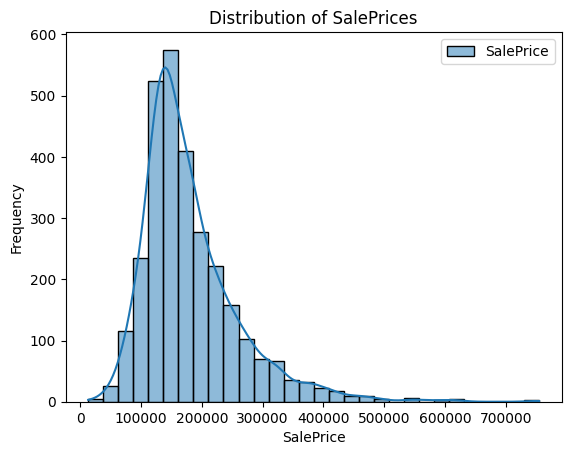

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical column and convert to Pandas
pandas_df = Df.select("SalePrice").toPandas()

# Use Seaborn/Matplotlib to create a histogram
sns.histplot(pandas_df, bins=30, kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Distribution of SalePrices")
plt.show()

In [ ]:
# Vérifier les valeurs manquantes

Df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in Df.columns]).show()


In [ ]:
Df.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in Df.columns]).show()

In [ ]:
# Convertir le DataFrame Spark en Pandas pour la visualisation
Df_pandas = Df.toPandas()

In [ ]:
# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
Df_pandas.columns[2:]

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

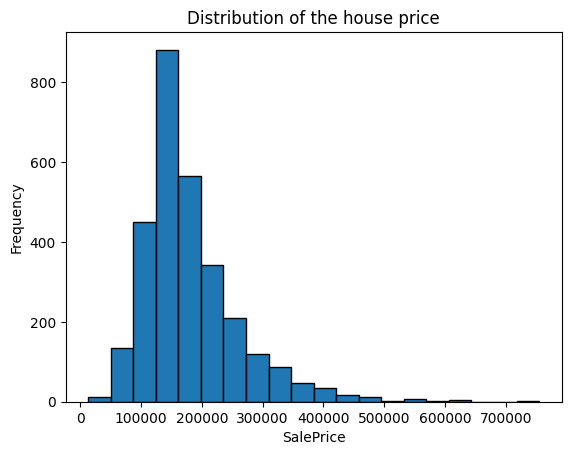

In [ ]:
# Afficher la distribution des colonnes numériques
import matplotlib.pyplot as plt

# Assurez-vous d'accéder aux données de la colonne SalePrice
SalePrice_data = Df_pandas[target_name]

# Tracer l'histogramme
SalePrice_data.plot.hist(bins=20, edgecolor='black')
plt.xlabel("SalePrice")
plt.title("Distribution of the house price")
plt.show()

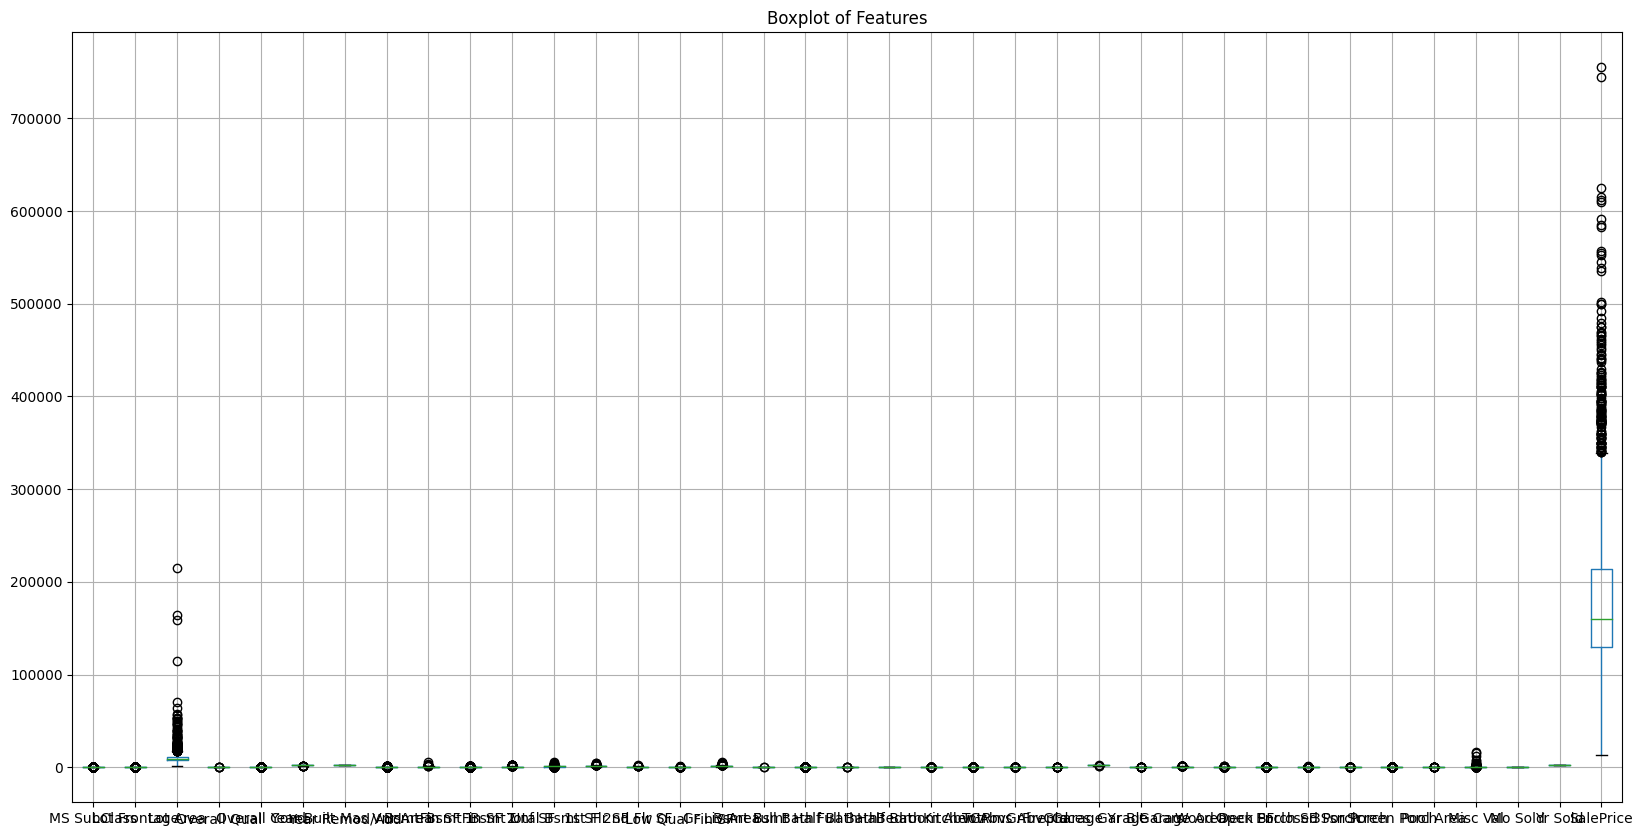

In [ ]:
# Boxplot des features
Df_pandas[num_cols].boxplot(figsize=(20,10))
plt.title('Boxplot of Features')
plt.show()

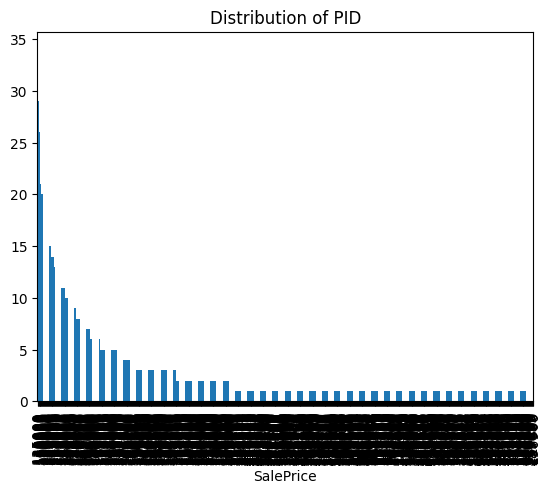

In [ ]:
# Distribution des diagnostics
Df_pandas["SalePrice"].value_counts().plot.bar()
plt.title('Distribution of PID')
plt.show()

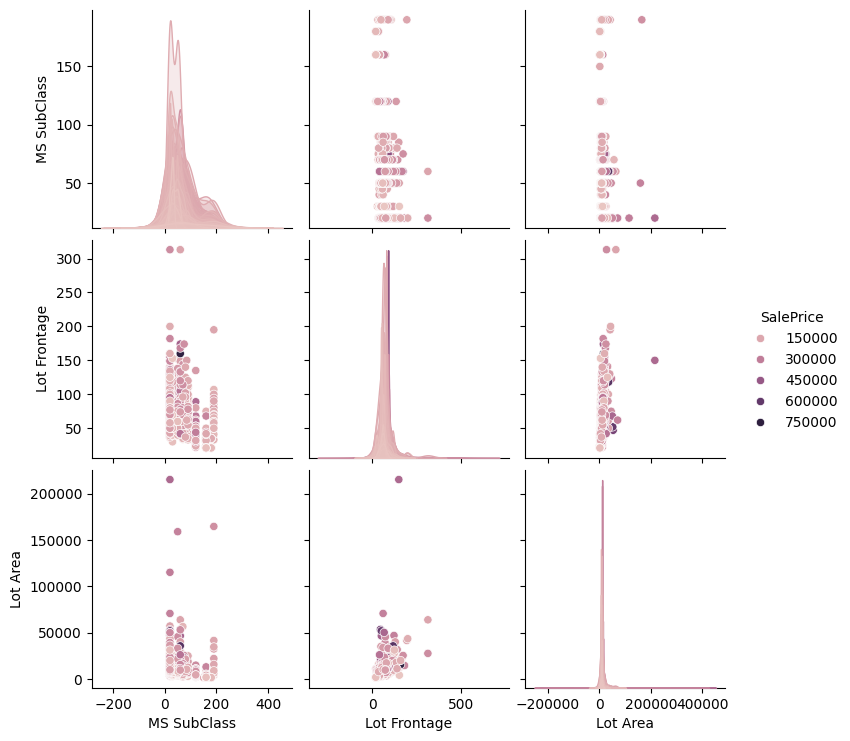

In [ ]:
# Pairplot des 10 premières features avec la variable cible
pairplot_cols = num_cols[:10].tolist() + ["SalePrice"]
sns.pairplot(Df_pandas[pairplot_cols], hue="SalePrice")
plt.show()

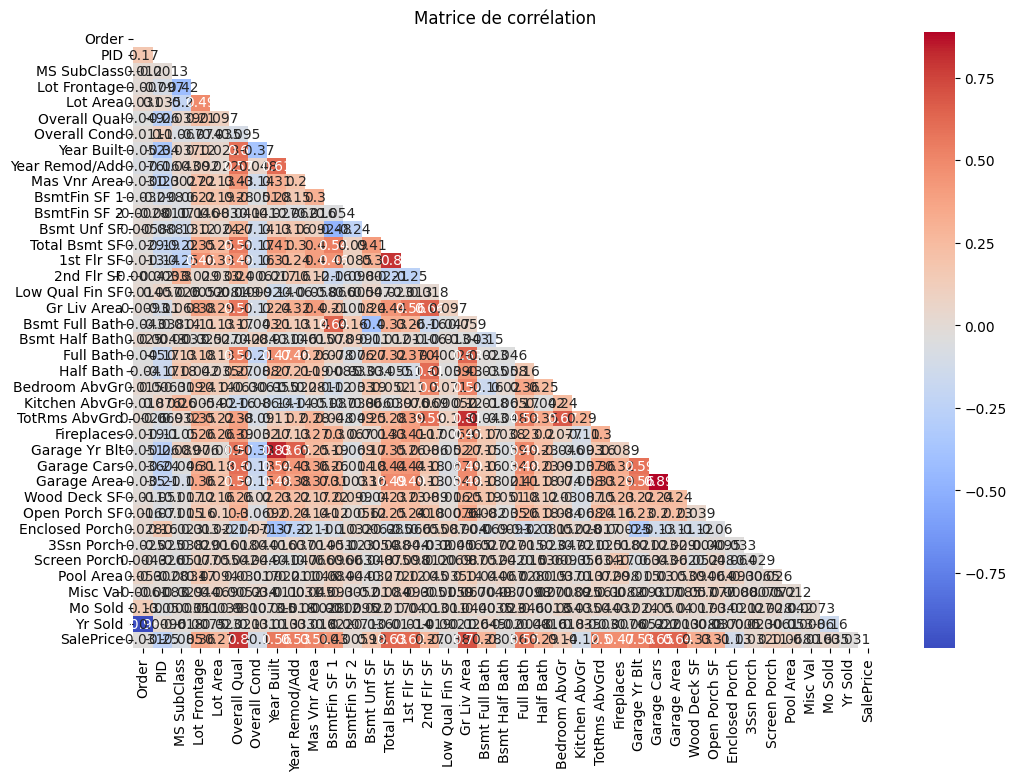

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner uniquement les colonnes numériques
numeric_cols = Df_pandas.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
corr = numeric_cols.corr()

# Générer un masque pour cacher la partie supérieure de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool))

# Tracer la heatmap de la matrice de corrélation
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", ax=ax)
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
# Suppression des données manquantes
df = Df_clean = Df.dropna()



In [ ]:
df.show()

+-----+---------+-----------+---------+------------+--------+------+-----+---------+------------+---------+----------+----------+------------+-----------+-----------+---------+-----------+------------+------------+----------+--------------+----------+---------+------------+------------+------------+------------+----------+----------+----------+---------+---------+-------------+--------------+------------+--------------+------------+-----------+-------------+-------+----------+-----------+----------+----------+----------+---------------+-----------+--------------+--------------+---------+---------+-------------+-------------+------------+-------------+----------+----------+------------+-----------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+------------+-------------+--------------+----------+------------+---------+-------+-----+------------+--------+-------+-------+---------+--------------+---------+
|Order|      PID|MS SubClass|MS Zoning|Lot

**Préparer les données pour le modèle**



In [ ]:
from pyspark.sql.types import StringType, IntegerType, DoubleType


# Obtenir le schéma du DataFrame
schema = Df.schema

# Séparer les colonnes numériques et catégorielles
numerical_columns = [ field.name for field in schema if isinstance(field.dataType, (IntegerType, DoubleType))]
categorical_columns = [field.name for field in schema if isinstance(field.dataType, StringType)]

# Afficher les colonnes numériques et catégoriellesprint("Colonnes numériques :", numerical_columns)
print("Colonnes catégorielles :", categorical_columns)
print("Colonnes numériques : ", numerical_columns)

Colonnes catégorielles : ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature', 'Sale Type', 'Sale Condition']
Colonnes numériques :  ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroo

In [ ]:
df_numeric = Df.select(numerical_columns)
df_clean = df_numeric.dropna()
df_clean.show()

+-----+---------+-----------+------------+--------+------------+------------+----------+--------------+------------+------------+------------+-----------+-------------+----------+----------+---------------+-----------+--------------+--------------+---------+---------+-------------+-------------+-------------+----------+-------------+-----------+-----------+------------+-------------+--------------+----------+------------+---------+--------+-------+-------+---------+
|Order|      PID|MS SubClass|Lot Frontage|Lot Area|Overall Qual|Overall Cond|Year Built|Year Remod/Add|Mas Vnr Area|BsmtFin SF 1|BsmtFin SF 2|Bsmt Unf SF|Total Bsmt SF|1st Flr SF|2nd Flr SF|Low Qual Fin SF|Gr Liv Area|Bsmt Full Bath|Bsmt Half Bath|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|TotRms AbvGrd|Fireplaces|Garage Yr Blt|Garage Cars|Garage Area|Wood Deck SF|Open Porch SF|Enclosed Porch|3Ssn Porch|Screen Porch|Pool Area|Misc Val|Mo Sold|Yr Sold|SalePrice|
+-----+---------+-----------+------------+--------+-------

In [ ]:
features = numerical_columns[2:-1]
print(features)

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']


In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=features, outputCol="features")
df_prepared = assembler.transform(df_clean).select("features", target_name)
df_prepared.show()

+--------------------+---------+
|            features|SalePrice|
+--------------------+---------+
|[20.0,141.0,31770...|   215000|
|[20.0,80.0,11622....|   105000|
|[20.0,81.0,14267....|   172000|
|[20.0,93.0,11160....|   244000|
|[60.0,74.0,13830....|   189900|
|[60.0,78.0,9978.0...|   195500|
|[120.0,41.0,4920....|   213500|
|[120.0,43.0,5005....|   191500|
|[120.0,39.0,5389....|   236500|
|[60.0,60.0,7500.0...|   189000|
|[60.0,75.0,10000....|   175900|
|[60.0,63.0,8402.0...|   180400|
|[20.0,85.0,10176....|   171500|
|[60.0,47.0,53504....|   538000|
|[50.0,152.0,12134...|   164000|
|[20.0,88.0,11394....|   394432|
|(36,[0,1,2,3,4,5,...|   141000|
|[20.0,85.0,13175....|   210000|
|[20.0,105.0,11751...|   190000|
|[85.0,85.0,10625....|   170000|
+--------------------+---------+
only showing top 20 rows



Diviser les données

In [ ]:
train_data, test_data = df_prepared.randomSplit([0.8, 0.2], seed = 25)

NameError: name 'df_prepared' is not defined

**Choisir et entraîner un modèle ML**

In [ ]:
from pyspark.ml.regression import LinearRegression

model = LinearRegression(featuresCol = 'features', labelCol = 'SalePrice')
trained_model = model.fit(train_data)

Évaluation du  modèle

In [ ]:
prediction = trained_model.transform(test_data)
prediction.show()

+--------------------+---------+------------------+
|            features|SalePrice|        prediction|
+--------------------+---------+------------------+
|(36,[0,1,2,3,4,5,...|   131500| 143359.7498265003|
|(36,[0,1,2,3,4,5,...|   120000| 116746.8307319713|
|(36,[0,1,2,3,4,5,...|   152000| 184546.2236655868|
|(36,[0,1,2,3,4,5,...|   130000|128109.32833501173|
|(36,[0,1,2,3,4,5,...|   181000|210682.51278287976|
|(36,[0,1,2,3,4,5,...|   142000| 160413.8864778917|
|(36,[0,1,2,3,4,5,...|   135000| 153781.3395584802|
|(36,[0,1,2,3,4,5,...|   171000| 209233.6522286625|
|(36,[0,1,2,3,4,5,...|   120000|127931.86794215988|
|(36,[0,1,2,3,4,5,...|   119500|107323.46693151409|
|(36,[0,1,2,3,4,5,...|    85000| 75770.22382833238|
|(36,[0,1,2,3,4,5,...|   138000|103851.33636690571|
|(36,[0,1,2,3,4,5,...|    87000| 58362.15261191304|
|(36,[0,1,2,3,4,5,...|   130000|137787.83687645255|
|(36,[0,1,2,3,4,5,...|   127000| 127818.4654004107|
|(36,[0,1,2,3,4,5,...|   129500|128284.73155723966|
|(36,[0,1,2,

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol = 'prediction', labelCol = 'SalePrice', metricName = 'mae')

**Optimisation du modèle**

In [ ]:
# Gestion des valeurs manquantes
# afficher le datset
Df.show()


+-----+---------+-----------+---------+------------+--------+------+-----+---------+------------+---------+----------+----------+------------+-----------+-----------+---------+-----------+------------+------------+----------+--------------+----------+---------+------------+------------+------------+------------+----------+----------+----------+---------+---------+-------------+--------------+------------+--------------+------------+-----------+-------------+-------+----------+-----------+----------+----------+----------+---------------+-----------+--------------+--------------+---------+---------+-------------+-------------+------------+-------------+----------+----------+------------+-----------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+------------+-------------+--------------+----------+------------+---------+-------+-----+------------+--------+-------+-------+---------+--------------+---------+
|Order|      PID|MS SubClass|MS Zoning|Lot

In [ ]:
from pyspark.sql.functions import col, when

# Calculer le pourcentage de valeurs manquantes par colonne
missing_data = Df.select([(1 - (count(when(col(c).isNull(), c)) / count("*"))).alias(c) for c in Df.columns])
missing_data.show()

+-----+---+-----------+---------+------------------+--------+------+-----+---------+------------+---------+----------+----------+------------+-----------+-----------+---------+-----------+------------+------------+----------+--------------+----------+---------+------------+------------+------------------+------------------+----------+----------+----------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------+----------+-----------+------------------+----------+----------+---------------+-----------+------------------+------------------+---------+---------+-------------+-------------+------------+-------------+----------+----------+------------+-----------+------------------+------------------+------------------+------------------+------------------+------------------+-----------+------------+-------------+--------------+----------+------------+---------+-------+-

In [ ]:

# Séparer les colonnes numériques
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, FloatType))]

# Séparer les colonnes catégorielles
categorical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, StringType)]

# Filtrer les lignes avec des valeurs manquantes pour les colonnes numériques
missing_numerical = df.filter(df[numerical_cols[0]].isNull())  # Pour le premier champ numérique

for col in numerical_cols[1:]:
    missing_numerical = missing_numerical.union(df.filter(df[col].isNull()))

# Filtrer les lignes avec des valeurs manquantes pour les colonnes catégorielles
missing_categorical = df.filter(df[categorical_cols[0]].isNull())  # Pour le premier champ catégoriel

for col in categorical_cols[1:]:
    missing_categorical = missing_categorical.union(df.filter(df[col].isNull()))

# Afficher les résultats
print("Données manquantes numériques :")
missing_numerical.show()

print("Données manquantes catégorielles :")
missing_categorical.show()


Données manquantes numériques :
+-----+---+-----------+---------+------------+--------+------+-----+---------+------------+---------+----------+----------+------------+-----------+-----------+---------+-----------+------------+------------+----------+--------------+----------+---------+------------+------------+------------+------------+----------+----------+----------+---------+---------+-------------+--------------+------------+--------------+------------+-----------+-------------+-------+----------+-----------+----------+----------+----------+---------------+-----------+--------------+--------------+---------+---------+-------------+-------------+------------+-------------+----------+----------+------------+-----------+-------------+-------------+-----------+-----------+-----------+-----------+-----------+------------+-------------+--------------+----------+------------+---------+-------+-----+------------+--------+-------+-------+---------+--------------+---------+-----------+-----

In [ ]:
#Imputation des valeurs manquantes
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=["PID", "MS SubClass"],  # Remplacez par vos colonnes numériques
    outputCols=["PID_imputed", "MS SubClass_imputed"]
).setStrategy("mean")

df = imputer.fit(df).transform(df)

In [ ]:
#Transformation des variables catégorielles
from pyspark.ml.feature import StringIndexer

indexers = [
    StringIndexer(inputCol="Sale Condition", outputCol="Sale Condition_index"),
    StringIndexer(inputCol="PID_imputed", outputCol="PID_imputed_index")
]

# Appliquer les indexeurs
for indexer in indexers:
    df = indexer.fit(df).transform(df)


In [ ]:
#Normalisation ou standardisation des données numériques
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Créer un vecteur des colonnes numériques
assembler = VectorAssembler(
    inputCols=["colonne_num1_imputed", "colonne_num2_imputed", "colonne_catégorielle1_index", "colonne_catégorielle2_index"],
    outputCol="features"
)

df = assembler.transform(df)

# Standardisation
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(df)
df = scalerModel.transform(df)


In [ ]:
from pyspark.sql.functions import col, mean
df_filled_n = Df[numerical_columns]
for col_name in numerical_columns:
  mean_value = df_filled_n.select(mean(col(col_name))).dropna().collect()[0][0]
  df_filled_n   = df_filled_n.fillna({col_name : mean_value})

df_filled_n.show()

+-----+---------+-----------+------------+--------+------------+------------+----------+--------------+------------+------------+------------+-----------+-------------+----------+----------+---------------+-----------+--------------+--------------+---------+---------+-------------+-------------+-------------+----------+-------------+-----------+-----------+------------+-------------+--------------+----------+------------+---------+--------+-------+-------+---------+
|Order|      PID|MS SubClass|Lot Frontage|Lot Area|Overall Qual|Overall Cond|Year Built|Year Remod/Add|Mas Vnr Area|BsmtFin SF 1|BsmtFin SF 2|Bsmt Unf SF|Total Bsmt SF|1st Flr SF|2nd Flr SF|Low Qual Fin SF|Gr Liv Area|Bsmt Full Bath|Bsmt Half Bath|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|TotRms AbvGrd|Fireplaces|Garage Yr Blt|Garage Cars|Garage Area|Wood Deck SF|Open Porch SF|Enclosed Porch|3Ssn Porch|Screen Porch|Pool Area|Misc Val|Mo Sold|Yr Sold|SalePrice|
+-----+---------+-----------+------------+--------+-------

In [ ]:
df_filled_n.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df_filled_n.columns]).show()

+-----+---+-----------+------------+--------+------------+------------+----------+--------------+------------+------------+------------+-----------+-------------+----------+----------+---------------+-----------+--------------+--------------+---------+---------+-------------+-------------+-------------+----------+-------------+-----------+-----------+------------+-------------+--------------+----------+------------+---------+--------+-------+-------+---------+
|Order|PID|MS SubClass|Lot Frontage|Lot Area|Overall Qual|Overall Cond|Year Built|Year Remod/Add|Mas Vnr Area|BsmtFin SF 1|BsmtFin SF 2|Bsmt Unf SF|Total Bsmt SF|1st Flr SF|2nd Flr SF|Low Qual Fin SF|Gr Liv Area|Bsmt Full Bath|Bsmt Half Bath|Full Bath|Half Bath|Bedroom AbvGr|Kitchen AbvGr|TotRms AbvGrd|Fireplaces|Garage Yr Blt|Garage Cars|Garage Area|Wood Deck SF|Open Porch SF|Enclosed Porch|3Ssn Porch|Screen Porch|Pool Area|Misc Val|Mo Sold|Yr Sold|SalePrice|
+-----+---+-----------+------------+--------+------------+------------

In [ ]:
from pyspark.sql.functions import col, mode
df_filled_c = Df[categorical_columns]
for col_name in categorical_columns:
  mode_value = df_filled_c.select(mode(col(col_name))).dropna().collect()[0][0]
  df_filled_c   = df_filled_c.fillna({col_name : mode_value})

df_filled_c.show()

+---------+------+-----+---------+------------+---------+----------+----------+------------+-----------+-----------+---------+-----------+----------+---------+------------+------------+------------+----------+----------+----------+---------+---------+-------------+--------------+--------------+-------+----------+-----------+----------+------------+----------+------------+-----------+-------------+-----------+-----------+-----------+-------+-----+------------+---------+--------------+
|MS Zoning|Street|Alley|Lot Shape|Land Contour|Utilities|Lot Config|Land Slope|Neighborhood|Condition 1|Condition 2|Bldg Type|House Style|Roof Style|Roof Matl|Exterior 1st|Exterior 2nd|Mas Vnr Type|Exter Qual|Exter Cond|Foundation|Bsmt Qual|Bsmt Cond|Bsmt Exposure|BsmtFin Type 1|BsmtFin Type 2|Heating|Heating QC|Central Air|Electrical|Kitchen Qual|Functional|Fireplace Qu|Garage Type|Garage Finish|Garage Qual|Garage Cond|Paved Drive|Pool QC|Fence|Misc Feature|Sale Type|Sale Condition|
+---------+------+----

In [ ]:
df_filled_c.select([count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df_filled_c.columns]).show()

+---------+------+-----+---------+------------+---------+----------+----------+------------+-----------+-----------+---------+-----------+----------+---------+------------+------------+------------+----------+----------+----------+---------+---------+-------------+--------------+--------------+-------+----------+-----------+----------+------------+----------+------------+-----------+-------------+-----------+-----------+-----------+-------+-----+------------+---------+--------------+
|MS Zoning|Street|Alley|Lot Shape|Land Contour|Utilities|Lot Config|Land Slope|Neighborhood|Condition 1|Condition 2|Bldg Type|House Style|Roof Style|Roof Matl|Exterior 1st|Exterior 2nd|Mas Vnr Type|Exter Qual|Exter Cond|Foundation|Bsmt Qual|Bsmt Cond|Bsmt Exposure|BsmtFin Type 1|BsmtFin Type 2|Heating|Heating QC|Central Air|Electrical|Kitchen Qual|Functional|Fireplace Qu|Garage Type|Garage Finish|Garage Qual|Garage Cond|Paved Drive|Pool QC|Fence|Misc Feature|Sale Type|Sale Condition|
+---------+------+----